# Dependencies in the project

In [19]:
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import textblob
import time

# Reading the dataset from a .csv file

In [20]:
data=pd.read_csv('final_epl.csv')

In [21]:
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,E0,10-08-2018,Man United,Leicester,2,1,H,1,0,H,...,1.75,1.70,2.29,2.21,1.55,4.07,7.69,NaN,NaN,NaN
1,E0,11-08-2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,2.20,2.13,1.80,1.75,1.88,3.61,4.70,NaN,NaN,NaN
2,E0,11-08-2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2.18,2.11,1.81,1.77,2.62,3.38,2.90,NaN,NaN,NaN
3,E0,11-08-2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,1.80,2.13,2.06,7.24,3.95,1.58,NaN,NaN,NaN
4,E0,11-08-2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2.20,2.12,1.80,1.76,4.74,3.53,1.89,NaN,NaN,NaN
5,E0,11-08-2018,Watford,Brighton,2,0,H,1,0,H,...,2.07,2.01,1.90,1.86,2.58,3.08,3.22,NaN,NaN,NaN
6,E0,11-08-2018,Wolves,Everton,2,2,D,1,1,D,...,2.04,1.98,1.92,1.88,2.44,3.23,3.32,NaN,NaN,NaN
7,E0,12-08-2018,Arsenal,Man City,0,2,A,0,1,A,...,1.78,1.74,2.21,2.15,4.43,4.13,1.81,NaN,NaN,NaN
8,E0,12-08-2018,Liverpool,West Ham,4,0,H,2,0,H,...,1.95,1.90,2.06,1.97,1.25,6.95,12.00,NaN,NaN,NaN
9,E0,12-08-2018,Southampton,Burnley,0,0,D,0,0,D,...,2.19,2.11,1.82,1.76,2.03,3.19,4.65,NaN,NaN,NaN


# Removing and scaling the irrelevant columns

In [22]:
res=data.ix[:,:23]
res

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10-08-2018,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11-08-2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11-08-2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11-08-2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11-08-2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
5,E0,11-08-2018,Watford,Brighton,2,0,H,1,0,H,...,5,0,10,16,8,2,2,2,0,0
6,E0,11-08-2018,Wolves,Everton,2,2,D,1,1,D,...,4,5,8,7,3,6,0,1,0,1
7,E0,12-08-2018,Arsenal,Man City,0,2,A,0,1,A,...,3,8,11,14,2,9,2,2,0,0
8,E0,12-08-2018,Liverpool,West Ham,4,0,H,2,0,H,...,8,2,14,9,5,4,1,2,0,0
9,E0,12-08-2018,Southampton,Burnley,0,0,D,0,0,D,...,3,6,10,9,8,5,0,1,0,0


In [23]:
required_features=data.ix[:,:7]
required_features 
# We are concerned with the given features mainly

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,E0,10-08-2018,Man United,Leicester,2,1,H
1,E0,11-08-2018,Bournemouth,Cardiff,2,0,H
2,E0,11-08-2018,Fulham,Crystal Palace,0,2,A
3,E0,11-08-2018,Huddersfield,Chelsea,0,3,A
4,E0,11-08-2018,Newcastle,Tottenham,1,2,A
5,E0,11-08-2018,Watford,Brighton,2,0,H
6,E0,11-08-2018,Wolves,Everton,2,2,D
7,E0,12-08-2018,Arsenal,Man City,0,2,A
8,E0,12-08-2018,Liverpool,West Ham,4,0,H
9,E0,12-08-2018,Southampton,Burnley,0,0,D


In [24]:

res.head()
final_table = data.ix[:,:23]

# Starting the tweepy API and testing it.

In [25]:

consumer_token='oyJ4rIN27irbxtLeNbSj0Cv5Y' 
consumer_secret='lPGEDr49RwQvmckTtnmiQ71pewbK5wC5jHjNUUApX3mjG6vynM'
access_token='1029620661256314880-k91AFnUf9OvuD8xERimbnl9ykJ8Klt'
access_token_secret='6y3iKjpOtBE27mHI0vzo21S6R5Y2XDjHsFhKWbAGXEqxw'



In [26]:

auth=tweepy.OAuthHandler(consumer_token,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)
api

In [27]:
tweets=api.search(q='Arsenal')
for tweet in tweets:
    print(tweet.text)

Transfer news live: Man City enquire about Arsenal target, AC Milan eye Man United ace &amp; more - https://t.co/t6yA2oy96A
RT @LosoLFC: Thank god you only beat us 1-1 because if it was more than that it would’ve been even more unbearable https://t.co/NDB7NWHSoz
RT @CULTURA_AZUL: Hace siete años, en cuartos de final, vencimos a Arsenal de Sarandí en El Viaducto, con goles de Eduardo Vargas @eduvarga…
@anirudh_arsenal Used by Mangaloreans / Marathis while having a bath on the first day of Diwali.

https://t.co/COdHvUnJsM
@Kitty01121 @Angela_J_Bailey @TrueFla @HantsHornet @yidsagainstfash @dannychoochoo @Baggienickjg @SittonsDinner… https://t.co/qTY5z70PMo
RT @thelifeofsim: I haven't seen a draw this hyped up in a while. https://t.co/DRw1YEZZeY
RT @charles_watts: So, Arsenal vs Milan (again) in the Europa League is now clearly nailed on at some point isn't it this season?
@clivepafc @YouTube They could do a similar one of Arsenal:

"Emery's Arsenal | 4-2-3-1 or 4-2-2-2?"
RT @Arsenal: Whe

# Scaling the Data

In [28]:
table4 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))
table4 = table4[:-10]
table4

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [29]:
res=res[:-10]

In [11]:
res

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10-08-2018,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11-08-2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11-08-2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11-08-2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11-08-2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
5,E0,11-08-2018,Watford,Brighton,2,0,H,1,0,H,...,5,0,10,16,8,2,2,2,0,0
6,E0,11-08-2018,Wolves,Everton,2,2,D,1,1,D,...,4,5,8,7,3,6,0,1,0,1
7,E0,12-08-2018,Arsenal,Man City,0,2,A,0,1,A,...,3,8,11,14,2,9,2,2,0,0
8,E0,12-08-2018,Liverpool,West Ham,4,0,H,2,0,H,...,8,2,14,9,5,4,1,2,0,0
9,E0,12-08-2018,Southampton,Burnley,0,0,D,0,0,D,...,3,6,10,9,8,5,0,1,0,0


In [30]:
home_teams=res.groupby('HomeTeam')
away_teams=res.groupby('AwayTeam')
home_teams

In [31]:
away_teams

In [32]:
table4.Team=home_teams.HomeTeam.all().values

In [33]:
table4.HGS=home_teams.FTHG.sum().values
table4.HGC=home_teams.FTAG.sum().values
table4.AGS=away_teams.FTHG.sum().values
table4.AGC=away_teams.FTAG.sum().values



In [34]:
table4.HAS=1+(table4.HGS)/200
table4.HDS=1-(table4.HGC)/200
table4.AAS=1+(table4.AGS)/200
table4.ADS=1-(table4.AGC)/200


# Sentimental Analysis finding favouriteness of each team


In [64]:
team_polarity = pd.DataFrame(columns=('Team','Strength'))
team_polarity

,Team,Strength


In [65]:
team_polarity.Team=home_teams.HomeTeam.all().values
team_polarity.Strength=table4.HAS
team_polarity

,Team,Strength
0,Arsenal,1.650
1,Aston Villa,1.070
2,Bournemouth,1.470
3,Brighton,1.160
4,Burnley,1.240
5,Cardiff,1.035
6,Chelsea,1.640
7,Crystal Palace,1.370
8,Everton,1.555
9,Fulham,1.030


In [75]:

from textblob import TextBlob
def polarity_finder(row):
    name=row['Team']
    tweets=api.search(name)
    polarity=0
    for tweet in tweets:
        val=TextBlob(tweet.text)
        polarity+=val.sentiment.polarity
    return (polarity/len(tweets))


In [76]:
team_polarity['Polarity']=team_polarity.apply(lambda row:polarity_finder(row),axis=1)  

In [77]:
team_polarity

,Team,Strength,Polarity
0,Arsenal,1.650,0.047500
1,Aston Villa,1.070,0.239141
2,Bournemouth,1.470,0.336128
3,Brighton,1.160,-0.022734
4,Burnley,1.240,0.152167
5,Cardiff,1.035,0.213106
6,Chelsea,1.640,0.061343
7,Crystal Palace,1.370,0.039672
8,Everton,1.555,0.168333
9,Fulham,1.030,-0.075185


# Personalized data for each team

In [35]:
table4

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,130,93,1.650,1.465,51,106,0.745,0.470
1,Aston Villa,14,37,1.070,1.185,35,13,0.825,0.935
2,Bournemouth,94,106,1.470,1.530,98,69,0.510,0.655
3,Brighton,32,36,1.160,1.180,31,13,0.845,0.935
4,Burnley,48,68,1.240,1.340,47,37,0.765,0.815
5,Cardiff,7,11,1.035,1.055,12,2,0.940,0.990
6,Chelsea,128,62,1.640,1.310,68,101,0.660,0.495
7,Crystal Palace,74,96,1.370,1.480,82,66,0.590,0.670
8,Everton,111,98,1.555,1.490,73,67,0.635,0.665
9,Fulham,6,15,1.030,1.075,13,5,0.935,0.975


# Final Fixture table

In [36]:
final_table = final_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for i,row in final_table.iterrows():
    f_HAS.append(table4[table4['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table4[table4['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table4[table4['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table4[table4['Team'] == row['AwayTeam']]['ADS'].values[0])
    
final_table['HAS'] = f_HAS
final_table['HDS'] = f_HDS
final_table['AAS'] = f_AAS
final_table['ADS'] = f_ADS

final_table

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Man United,Leicester,H,6,4,1.480,0.815,1.515,0.560
1,Bournemouth,Cardiff,H,4,1,1.470,0.510,1.055,0.990
2,Fulham,Crystal Palace,A,6,9,1.030,0.935,1.480,0.670
3,Huddersfield,Chelsea,A,1,4,1.080,0.840,1.310,0.495
4,Newcastle,Tottenham,A,2,5,1.255,0.755,1.280,0.415
5,Watford,Brighton,H,5,0,1.400,0.575,1.180,0.935
6,Wolves,Everton,D,4,5,1.030,0.975,1.490,0.665
7,Arsenal,Man City,A,3,8,1.650,0.745,1.275,0.400
8,Liverpool,West Ham,H,8,2,1.675,0.745,1.540,0.565
9,Southampton,Burnley,D,3,6,1.375,0.625,1.340,0.815


In [37]:
def computeResult(row):
    if row['FTR']=='H':
        return 1
    elif row['FTR']=='A':
        return -1
    else:
        return 0
final_table['result']=final_table.apply(lambda row:computeResult(row),axis=1)    

In [21]:
final_table

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,result
0,Man United,Leicester,H,6,4,1.480,0.815,1.515,0.560,1
1,Bournemouth,Cardiff,H,4,1,1.470,0.510,1.055,0.990,1
2,Fulham,Crystal Palace,A,6,9,1.030,0.935,1.480,0.670,-1
3,Huddersfield,Chelsea,A,1,4,1.080,0.840,1.310,0.495,-1
4,Newcastle,Tottenham,A,2,5,1.255,0.755,1.280,0.415,-1
5,Watford,Brighton,H,5,0,1.400,0.575,1.180,0.935,1
6,Wolves,Everton,D,4,5,1.030,0.975,1.490,0.665,0
7,Arsenal,Man City,A,3,8,1.650,0.745,1.275,0.400,-1
8,Liverpool,West Ham,H,8,2,1.675,0.745,1.540,0.565,1
9,Southampton,Burnley,D,3,6,1.375,0.625,1.340,0.815,0


# Establishing the Training and Testing DataSet

In [38]:
X_train = final_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = final_table['result']


In [39]:
X_train

,HST,AST,HAS,HDS,AAS,ADS
0,6,4,1.480,0.815,1.515,0.560
1,4,1,1.470,0.510,1.055,0.990
2,6,9,1.030,0.935,1.480,0.670
3,1,4,1.080,0.840,1.310,0.495
4,2,5,1.255,0.755,1.280,0.415
5,5,0,1.400,0.575,1.180,0.935
6,4,5,1.030,0.975,1.490,0.665
7,3,8,1.650,0.745,1.275,0.400
8,8,2,1.675,0.745,1.540,0.565
9,3,6,1.375,0.625,1.340,0.815


In [40]:
y_train

0       1
1       1
2      -1
3      -1
4      -1
5       1
6       0
7      -1
8       1
9       0
10      0
11      1
12      1
13      1
14      1
15     -1
16      1
17     -1
18      1
19     -1
20      1
21      0
22      0
23      1
24     -1
25      0
26      1
27     -1
28      1
29     -1
       ..
1210    1
1211   -1
1212    0
1213    1
1214    1
1215    0
1216    0
1217    0
1218    1
1219    1
1220   -1
1221    1
1222   -1
1223    1
1224    0
1225   -1
1226    1
1227    0
1228    1
1229    1
1230    1
1231    0
1232    1
1233    1
1234    1
1235    1
1236    0
1237    0
1238    0
1239    1
Name: result, dtype: int64

In [41]:
clf=RandomForestClassifier()

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [44]:
X_train

,HST,AST,HAS,HDS,AAS,ADS
382,3,2,1.675,0.745,1.380,0.835
743,4,11,1.400,0.575,1.415,0.680
617,8,3,1.470,0.510,1.410,0.455
273,2,6,1.495,0.645,1.480,0.670
413,4,7,1.640,0.660,1.280,0.415
362,3,6,1.320,0.615,1.180,0.935
237,5,3,1.555,0.635,1.540,0.565
464,3,8,1.315,0.615,1.415,0.680
2,6,9,1.030,0.935,1.480,0.670
6,4,5,1.030,0.975,1.490,0.665


In [45]:
y_train

0       1
1       1
2      -1
3      -1
4      -1
5       1
6       0
7      -1
8       1
9       0
10      0
11      1
12      1
13      1
14      1
15     -1
16      1
17     -1
18      1
19     -1
20      1
21      0
22      0
23      1
24     -1
25      0
26      1
27     -1
28      1
29     -1
       ..
1210    1
1211   -1
1212    0
1213    1
1214    1
1215    0
1216    0
1217    0
1218    1
1219    1
1220   -1
1221    1
1222   -1
1223    1
1224    0
1225   -1
1226    1
1227    0
1228    1
1229    1
1230    1
1231    0
1232    1
1233    1
1234    1
1235    1
1236    0
1237    0
1238    0
1239    1
Name: result, dtype: int64

In [46]:
X_test


,HST,AST,HAS,HDS,AAS,ADS
415,4,5,1.160,0.845,1.235,0.920
259,3,6,1.375,0.625,1.465,0.470
332,2,2,1.240,0.765,1.355,0.555
622,6,6,1.140,0.825,1.480,0.670
101,2,4,1.160,0.845,1.275,0.400
427,7,1,1.675,0.745,1.530,0.655
552,6,0,1.640,0.660,1.515,0.560
244,3,4,1.495,0.645,1.340,0.815
78,2,2,1.675,0.745,1.275,0.400
615,3,5,1.335,0.620,1.535,0.710


In [85]:
Y_test

415     0
259     0
332    -1
622     0
101    -1
427     1
552     1
244     1
78      0
615     1
983    -1
462     1
63     -1
978     0
128     0
477    -1
275    -1
760     0
43      1
636    -1
548     0
377    -1
86     -1
682    -1
113     1
198     1
558     1
914    -1
721     1
542     0
       ..
679     1
541    -1
1155   -1
865    -1
1088   -1
424     1
350     1
227    -1
764    -1
823    -1
1015    0
428    -1
66      1
67      1
624     1
211     1
12      1
1109    0
724     1
299    -1
590    -1
808    -1
1111    1
479     1
1098    1
1175    1
1004    1
986    -1
549     1
1157   -1
Name: result, dtype: int64

# Predicting each fixture using logistic regression

In [47]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
score_train=logreg.score(X_train,Y_train)
score_test=logreg.score(X_test,Y_test)
print('Training set accuracy is:','%.3f'%(score_train))
print('Testing set accuracy is:','%.3f'%(score_test))


Training set accuracy is: 0.597
Testing set accuracy is: 0.586


In [49]:
pred_set=final_table[['HST','AST','HAS','HDS','AAS','ADS']]
prediction=logreg.predict(pred_set)


In [50]:
pred_set


,HST,AST,HAS,HDS,AAS,ADS
0,6,4,1.480,0.815,1.515,0.560
1,4,1,1.470,0.510,1.055,0.990
2,6,9,1.030,0.935,1.480,0.670
3,1,4,1.080,0.840,1.310,0.495
4,2,5,1.255,0.755,1.280,0.415
5,5,0,1.400,0.575,1.180,0.935
6,4,5,1.030,0.975,1.490,0.665
7,3,8,1.650,0.745,1.275,0.400
8,8,2,1.675,0.745,1.540,0.565
9,3,6,1.375,0.625,1.340,0.815


In [107]:
print('**************************** As Predicted by Logical Regression Algorithm **********************************************')
print('')
winner=[]
for i in range(0,final_table.shape[0]):
    print(final_table.HomeTeam[i]+' vs '+final_table.AwayTeam[i])
    if prediction[i]==1:
        print('Winner:'+final_table.HomeTeam[i])
        winner.append(final_table.HomeTeam[i])
    elif prediction[i]==-1:
        print('Winner:'+final_table.AwayTeam[i])
        winner.append(final_table.AwayTeam[i])
    elif prediction[i]==0:
        print('Machine predicts a Draw')
        winner.append('Draw')
    print('')    
        

**************************** As Predicted by Logical Regression Algorithm **********************************************

Man United vs Leicester
Winner:Man United

Bournemouth vs Cardiff
Winner:Bournemouth

Fulham vs Crystal Palace
Winner:Crystal Palace

Huddersfield vs Chelsea
Winner:Chelsea

Newcastle vs Tottenham
Winner:Tottenham

Watford vs Brighton
Winner:Watford

Wolves vs Everton
Machine predicts a Draw

Arsenal vs Man City
Winner:Man City

Liverpool vs West Ham
Winner:Liverpool

Southampton vs Burnley
Machine predicts a Draw

Cardiff vs Newcastle
Winner:Cardiff

Chelsea vs Arsenal
Winner:Chelsea

Everton vs Southampton
Winner:Everton

Leicester vs Wolves
Winner:Leicester

Tottenham vs Fulham
Winner:Tottenham

West Ham vs Bournemouth
Winner:Bournemouth

Brighton vs Man United
Winner:Brighton

Burnley vs Watford
Winner:Watford

Man City vs Huddersfield
Winner:Man City

Crystal Palace vs Liverpool
Winner:Liverpool

Arsenal vs West Ham
Winner:Arsenal

Bournemouth vs Everton
Machin

In [108]:
logtable = pd.DataFrame(columns=('Home','Away','Winner'))
logtable.Home=final_table.HomeTeam
logtable.Away=final_table.AwayTeam
logtable.Winner=winner


In [109]:
logtable

,Home,Away,Winner
0,Man United,Leicester,Man United
1,Bournemouth,Cardiff,Bournemouth
2,Fulham,Crystal Palace,Crystal Palace
3,Huddersfield,Chelsea,Chelsea
4,Newcastle,Tottenham,Tottenham
5,Watford,Brighton,Watford
6,Wolves,Everton,Draw
7,Arsenal,Man City,Man City
8,Liverpool,West Ham,Liverpool
9,Southampton,Burnley,Draw


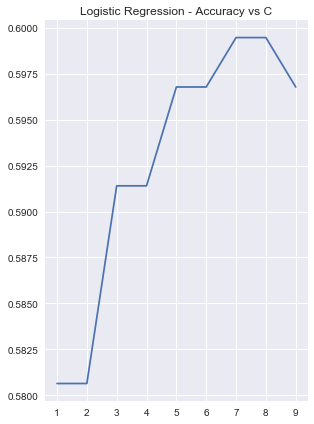

In [52]:
%matplotlib inline
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, Y_train)
    scores = accuracy_score(Y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)

fig = plt.figure(figsize = (16,7))
ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")


# Predicting each fixture result using Random Forest Classifier

In [53]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [54]:
score_train=rf.score(X_train,Y_train)
score_test=rf.score(X_test,Y_test)
print('Training set accuracy is:','%.3f'%(score_train))
print('Testing set accuracy is:','%.3f'%(score_test))

Training set accuracy is: 0.970
Testing set accuracy is: 0.500


In [105]:
pred_set=final_table[['HST','AST','HAS','HDS','AAS','ADS']]
prediction=rf.predict(pred_set)
print('**************************** As Predicted by Random Forest Classifier **********************************************')
print('')
winner=[]
for i in range(0,final_table.shape[0]):
    print(final_table.HomeTeam[i]+' vs '+final_table.AwayTeam[i])
    if prediction[i]==1:
        print('Winner:'+final_table.HomeTeam[i])
        winner.append(final_table.HomeTeam[i])
    elif prediction[i]==-1:
        print('Winner:'+final_table.AwayTeam[i])
        winner.append(final_table.AwayTeam[i])
    elif prediction[i]==0:
        print('Machine predicts a Draw')
        winner.append('Draw')
    print('')    


**************************** As Predicted by Random Forest Classifier **********************************************

Man United vs Leicester
Winner:Man United

Bournemouth vs Cardiff
Winner:Bournemouth

Fulham vs Crystal Palace
Winner:Crystal Palace

Huddersfield vs Chelsea
Winner:Chelsea

Newcastle vs Tottenham
Winner:Tottenham

Watford vs Brighton
Winner:Watford

Wolves vs Everton
Machine predicts a Draw

Arsenal vs Man City
Winner:Man City

Liverpool vs West Ham
Winner:Liverpool

Southampton vs Burnley
Machine predicts a Draw

Cardiff vs Newcastle
Winner:Cardiff

Chelsea vs Arsenal
Winner:Chelsea

Everton vs Southampton
Winner:Everton

Leicester vs Wolves
Winner:Leicester

Tottenham vs Fulham
Winner:Tottenham

West Ham vs Bournemouth
Winner:Bournemouth

Brighton vs Man United
Winner:Brighton

Burnley vs Watford
Winner:Watford

Man City vs Huddersfield
Winner:Man City

Crystal Palace vs Liverpool
Winner:Liverpool

Arsenal vs West Ham
Winner:Arsenal

Bournemouth vs Everton
Machine pr

In [106]:
rftable = pd.DataFrame(columns=('Home','Away','Winner'))
rftable.Home=final_table.HomeTeam
rftable.Away=final_table.AwayTeam
rftable.Winner=winner
rftable

,Home,Away,Winner
0,Man United,Leicester,Man United
1,Bournemouth,Cardiff,Bournemouth
2,Fulham,Crystal Palace,Crystal Palace
3,Huddersfield,Chelsea,Chelsea
4,Newcastle,Tottenham,Tottenham
5,Watford,Brighton,Watford
6,Wolves,Everton,Draw
7,Arsenal,Man City,Man City
8,Liverpool,West Ham,Liverpool
9,Southampton,Burnley,Draw


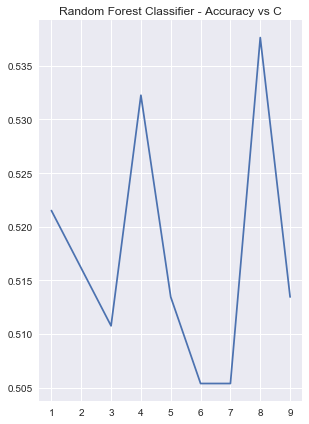

In [55]:
%matplotlib inline
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = RandomForestClassifier()
    clf_logreg.fit(X_train, Y_train)
    scores = accuracy_score(Y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)

fig = plt.figure(figsize = (16,7))
ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Random Forest Classifier - Accuracy vs C")


# Predicting each fixture result using Twitter Sentimental Analysis

In [80]:
def polarity_predictor(name):
    tweets=api.search(name)
    polarity=0
    for tweet in tweets:
        val=TextBlob(tweet.text)
        polarity+=val.sentiment.polarity
    return (polarity/len(tweets))


In [110]:

print('**************************** As Predicted by Twitter Sentiment Analysis **********************************************')

print('')
predict=[]

val=[]
winner=[]
for i in range(0,final_table.shape[0]):
    
    for j in range(0,team_polarity.shape[0]):
        if team_polarity.Team[j]==final_table.HomeTeam[i]:
            pol1=team_polarity.Polarity[j]
        if team_polarity.Team[j]==final_table.AwayTeam[i]:
            pol2=team_polarity.Polarity[j]
    predict.append(pol1-pol2)
    
    
for i in range(0,final_table.shape[0]): 
    print(final_table.HomeTeam[i]+' vs '+final_table.AwayTeam[i])
    if predict[i]>0:
        print('Winner:'+final_table.HomeTeam[i])
        val.append(0.5+predict[i])
        winner.append(final_table.HomeTeam[i])
        print('Probability:'+str(0.5+predict[i]))
    elif predict[i]<0:
        print('Winner:'+final_table.AwayTeam[i])
        val.append(0.5-predict[i])
        winner.append(final_table.AwayTeam[i])
        print('Probability:'+str(0.5-predict[i]))
    elif predict[i]==0:
        print('Machine predicts a Draw')
        winner.append('Draw')
        val.append(0.5)
    print('')    
    

**************************** As Predicted by Twitter Sentiment Analysis **********************************************

Man United vs Leicester
Winner:Leicester
Probability:0.624236111111

Bournemouth vs Cardiff
Winner:Bournemouth
Probability:0.623022078781

Fulham vs Crystal Palace
Winner:Crystal Palace
Probability:0.614856902357

Huddersfield vs Chelsea
Winner:Chelsea
Probability:0.542083333333

Newcastle vs Tottenham
Winner:Tottenham
Probability:0.561136964887

Watford vs Brighton
Winner:Watford
Probability:0.581378066378

Wolves vs Everton
Winner:Everton
Probability:0.69

Arsenal vs Man City
Winner:Man City
Probability:0.558106060606

Liverpool vs West Ham
Winner:West Ham
Probability:0.653476430976

Southampton vs Burnley
Winner:Burnley
Probability:0.53954040404

Cardiff vs Newcastle
Winner:Cardiff
Probability:0.571401923143

Chelsea vs Arsenal
Winner:Chelsea
Probability:0.513842592593

Everton vs Southampton
Winner:Everton
Probability:0.555707070707

Leicester vs Wolves
Winner:Lei

In [111]:
sttable = pd.DataFrame(columns=('Home','Away','Winner','Probability'))
sttable.Home=final_table.HomeTeam
sttable.Away=final_table.AwayTeam
sttable.Winner=winner
sttable.Probability=val
sttable

,Home,Away,Winner,Probability
0,Man United,Leicester,Leicester,0.624236
1,Bournemouth,Cardiff,Bournemouth,0.623022
2,Fulham,Crystal Palace,Crystal Palace,0.614857
3,Huddersfield,Chelsea,Chelsea,0.542083
4,Newcastle,Tottenham,Tottenham,0.561137
5,Watford,Brighton,Watford,0.581378
6,Wolves,Everton,Everton,0.690000
7,Arsenal,Man City,Man City,0.558106
8,Liverpool,West Ham,West Ham,0.653476
9,Southampton,Burnley,Burnley,0.539540


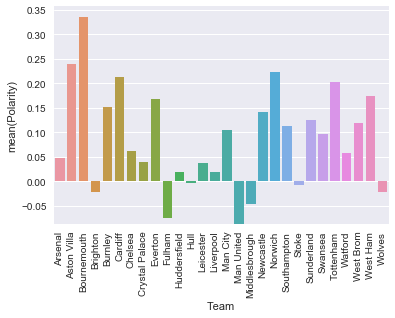

In [96]:
has_plot = sns.barplot(team_polarity.Team,team_polarity.Polarity)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

# Plotting original Attacking strengths of each team

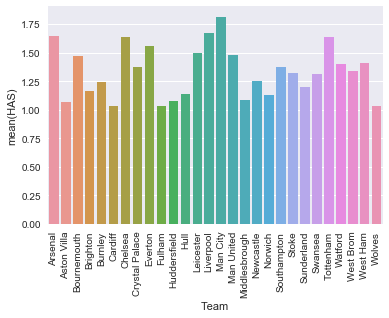

In [78]:
has_plot = sns.barplot(table4.Team,table4.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)